In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

D = pd.read_excel('D:\Desktop\Project\FlightSales.xlsx')

print('Loading Dataset Compelete!')

done reading!


In [85]:
print(len(D))

211775


In [86]:
#Check duplicated rows:

#delete column "id" because it makes difference between duplicated rows
D = D.drop(['id'] , axis = 1)

KeyError: "['id'] not found in axis"

In [87]:
D_uniq = D.drop_duplicates(keep = 'first')
print('number of unique rows is:', len(D_uniq))

number of unique rows is: 143395


In [88]:
print('number of repeated rows is:',len(D) - len(D_uniq))

number of repeated rows is: 68380


In [89]:
#find out how many missing values we have in each column
print('total number of missig values in each coumn: \n',D.isna().sum())

total number of missig values in each coumn: 
 user_id              0
request_date_id      0
request_time         0
departure_date_id    0
departure_time_id    2
company              0
source               6
destination          5
price                0
dtype: int64


In [90]:
#how many missing values does our data have in total?
print('total number of missig values in data: \n',D.isna().sum().sum())

total number of missig values in data: 
 13


In [91]:
#in case you want to see the invalid data un-comment the two following cells codes below

In [92]:
#the following code is to find NaNs and their position, where are our missing values in case we want to know?
#idx, idy = np.where(pd.isnull(D))
#result = np.column_stack([D.index[idx], D.columns[idy]])
#print('location of NaN(missing) values:')
#print(result)

In [93]:
#print all the rows that have one pr more missing value
#e = D.loc[[x for x in idx]]
#print (e)

In [94]:
# user ids must be int numbers more than 0
#the following line is to see ids list:
id1 = sorted(D['user_id'].unique())
num = 0 #to count total number of invalid user ids
for i in id1:
    if i < 1:
        print('invalid user id:',i)
        num += 1
print('total number of invalid ids is:', num)

invalid user id: -1
total number of invalid ids is: 1


In [95]:
#find out how many zeros we have in each column
print('each column’s total count of zeros: \n',(D == 0).astype(int).sum(axis=0))

each column’s total count of zeros: 
 user_id                  0
request_date_id          0
request_time             0
departure_date_id    12867
departure_time_id        0
company                  0
source                   0
destination              0
price                    0
dtype: int64


In [96]:
#find out how many zeros we have in each column
print('total number of zero values in data: \n',(D == 0).astype(int).sum(axis=0).sum())

total number of zero values in data: 
 12867


In [97]:
#CLEANING DATA TO FIND OUT HOW MUCH OF IT US USEFUL
#NOTE: This code is also used in CleanFileExporter for exporting the usable csv file

# removing the duplicated rows, only keeping one of them
#Clean_D = D.drop_duplicates( keep = 'first')
#!!!NOTE: duplicated rows means a user has bought several tickets thus we decide to keep them.

#Drop rows which contain missing values.
Clean_D = D.dropna()

# Get names of indexes for which column departure_date_id has value 0
indexNames2 = Clean_D[ Clean_D['departure_date_id'] == 0 ].index
# Delete these rows from dataFrame
Clean_D.drop(indexNames2 , inplace=True)

# Get names of indexes for which column user_id has value less than 1
indexNames = Clean_D[ Clean_D['user_id'] < 1 ].index
# Delete these rows from dataFrame
Clean_D.drop(indexNames , inplace=True)


In [98]:
print(len(Clean_D) , 'number of rows is usable') 

198814 number of rows is usable


In [99]:
x = len(Clean_D)/len(D)
print(round(x*100,2) , '% of Data is usable')

93.88 % of Data is usable


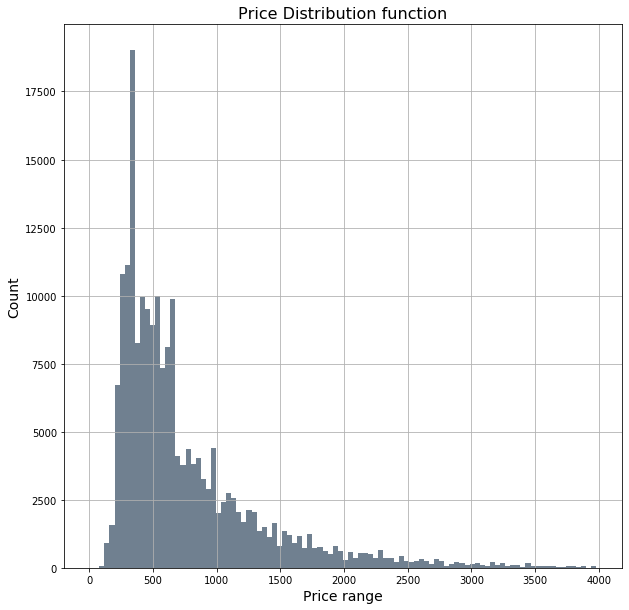

In [100]:
# Get names of indexes for which column price has value more than 4000
indexNames3 = Clean_D[Clean_D['price'] > 4000].index
 
# Delete these row indexes from dataFrame
histogram = Clean_D.drop(indexNames3)


histogram.hist(column = 'price', bins = 100, figsize = (10,10) , color = 'slategrey')
plt.xlabel('Price range' , fontsize = 14)
plt.title('Price Distribution function', fontsize = 16)
plt.ylabel('Count', fontsize = 14)
plt.show()